In [ ]:
!pip install tensorflow-gpu==2.10.0
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successf

**Importing necessary libraries**


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from google.colab import files
from IPython.display import Image
from google.colab import drive
from os import listdir
from keras import datasets
from sklearn.metrics import accuracy_score


from keras.applications import resnet
from keras.applications import vgg19

drive.mount('/content/gdrive', force_remount='true')

Mounted at /content/gdrive


** *italicized text*Importing Dataset from Google drive**


In [4]:
X=[]
y=[]

path = '/content/gdrive/My Drive/Dataset/No_ball/No_ball/'
data = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.jpeg')]

for i in range(len(data)):
  im1=cv2.imread(data[i], cv2.IMREAD_UNCHANGED)
  im= cv2.resize(im1, (100,100))
  X.append(im)
  y.append(0)


path = '/content/gdrive/My Drive/Dataset/Legal/Legal/'
data = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.jpeg')]
X1=[]
for i in range(len(data)):
  im1=cv2.imread(data[i], cv2.IMREAD_UNCHANGED)
  im = cv2.resize(im1, (100,100))
  X.append(im)
  y.append(1)


In [5]:
for i in range(len(X)):
  print(X[i].shape)


(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [37]:
from numpy.core.memmap import ndarray
X = np.array(X)
X_max = np.max(X)
X=X/X_max

X=np.array(X, dtype = ndarray)
y=np.array(y, dtype = ndarray)
print(X.shape)
print(y.shape)

(1424, 100, 100, 3)
(1424,)


In [38]:
y = np.array(y, dtype= int)
y_pred = np.array([0] * len(y))
print('The baseline accuracy: %.3f' %accuracy_score(y_pred, y,normalize=True))

The baseline accuracy: 0.663


**Data Preprocessing**

**Image** **Specifications**

In [39]:
NCLASSES = 2
HEIGHT = 100
WIDTH = 100
NUM_CHANNELS = 3

**Model Initialisation using Transfer learning (VGG19)**

In [46]:
model=Sequential()
model.add(vgg19.VGG19(include_top = False, input_shape = (HEIGHT, WIDTH, NUM_CHANNELS), weights ='imagenet', classes = 2, pooling  = MaxPool2D(pool_size=(2,2))))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Example compilation, adjust as needed


# print(model.summary())

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print(model.summary())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
X = np.asarray(X_train).astype(np.float32)
y = np.asarray(y_train).astype(np.float32)
X_t = np.asarray(X_test).astype(np.float32)
y_t = np.asarray(y_test).astype(np.float32)


**Training Model**

In [48]:
checkpoint_path = "/content/gdrive/My Drive/Save/X.weights.h5"
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
history = model.fit(X, y, batch_size = 10, epochs = 4  ,callbacks=[cp_callback])

Epoch 1/4
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7194 - loss: 1.8591
Epoch 1: saving model to /content/gdrive/My Drive/Save/X.weights.h5
114/114 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.7202 - loss: 1.8500
Epoch 2/4
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9462 - loss: 0.1204
Epoch 2: saving model to /content/gdrive/My Drive/Save/X.weights.h5
114/114 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9464 - loss: 0.1202
Epoch 3/4
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9739 - loss: 0.0638
Epoch 3: saving model to /content/gdrive/My Drive/Save/X.weights.h5
114/114 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9739 - loss: 0.0636
Epoch 4/4
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9910 - loss: 0.0240
Epoch 4: saving model to /content/gdrive/My Drive/Save/X.weights.h5
114/114 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9910 - loss: 0.0241


**Model Accuracy**

Text(0.5, 1.0, 'Model Accuracy')

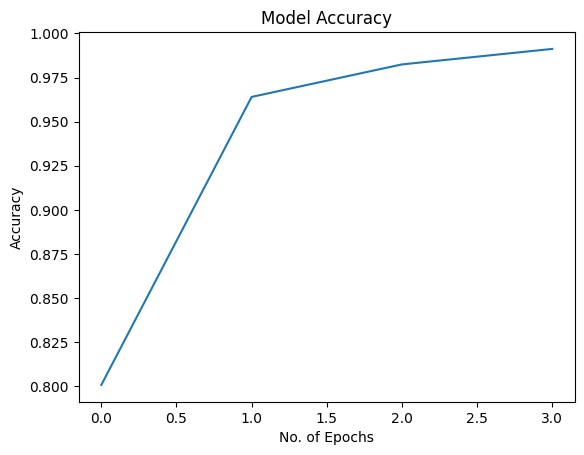

In [49]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

**Model Loss**

Text(0.5, 1.0, 'Model Loss')

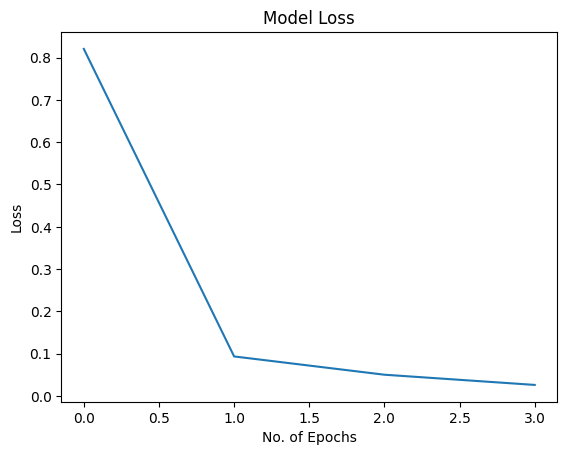

In [50]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

**Testing Model against Test Data**

In [51]:
y_pred = (model.predict(X_t) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_t)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score - ",accuracy_score(y_pred, y_t[:len(y_pred)]))
print("Precision Score - ",precision_score(y_pred,y_t[:len(y_pred)]))
print("Recall Score - ",recall_score(y_pred, y_t[:len(y_pred)]))
print("f1 Score - ",f1_score(y_pred, y_t[:len(y_pred)]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step
accuracy score -  0.9754385964912281
Precision Score -  0.9560439560439561
Recall Score -  0.9666666666666667
f1 Score -  0.9613259668508287


In [52]:
path="/content/gdrive/My Drive/Dataset/Save"
#To print accuracy on your dataset, give text file containing target outputs (0 for legal ball and 1 for no ball linewise)
target_output="/content/gdrive/My Drive/Dataset/Save/zero.txt"

#provide path to model and weight saves
model_path="/content/gdrive/My Drive/Dataset/Save/model_save.h5"
weights_path="/content/gdrive/My Drive/Dataset/Save/model_weight.pickle"